<a href="https://colab.research.google.com/github/JoDeMiro/Ember/blob/main/Python_Fuzzy_Bemutat%C3%B3_a_Tan%C3%A1rn%C5%91nek_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

import ipywidgets as widgets

from ipywidgets import IntSlider
from ipywidgets import HTML
from ipywidgets import interact, interactive, fixed, interact_manual

In [ ]:
# Create universe

Felhőtakaró = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'sky')

Hőmérséklet = ctrl.Antecedent(np.arange(-30, 50.1, 0.1), 'temperature')

Sebesség    = ctrl.Consequent(np.arange(0, 130, 1), 'speed')

No handles with labels found to put in legend.


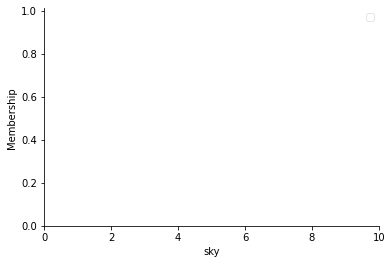

In [ ]:
Felhőtakaró.view()

In [ ]:
Felhőtakaró.universe

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

In [ ]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a felhőtakaró{felhős})

Felhőtakaró['felhős'] = fuzzy.trimf(Felhőtakaró.universe, [0, 3.5, 7])

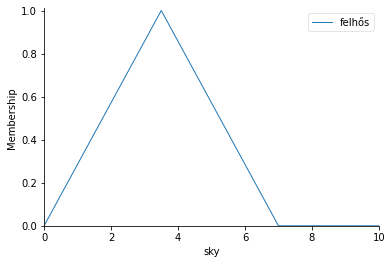

In [ ]:
Felhőtakaró.view()

In [ ]:
# Határozzuk meg a tagsági függvényeket (ez esetben most a felhőtakaró{napos})

Felhőtakaró['napos'] = fuzzy.trimf(Felhőtakaró.universe, [3, 6.5, 10])

In [ ]:
# Eddig megvagyunk a Felhőtakaró változó tagsági fűggvényeivel {felhős, napos}

# Most készítsük el a Hőmérséklet tagsági függvényeit is {hideg, meleg}

# Itt direkt más tagsági függvényt használnok (trampf)

Hőmérséklet['hideg'] = fuzzy.trapmf(Hőmérséklet.universe, [-30, -30, 0, 30])

Hőmérséklet['meleg'] = fuzzy.trapmf(Hőmérséklet.universe, [0, 30, 50, 50])

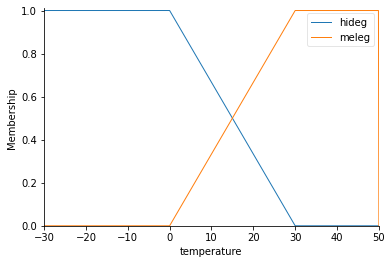

In [ ]:
Hőmérséklet.view()

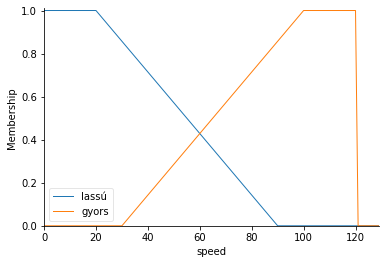

In [ ]:
# Most készítsük el a Sebesség változó tagsági függvyényeit is {Lassú, Gyors}

Sebesség['lassú'] = fuzzy.trapmf(Sebesség.universe, [0, 0, 20, 90])
Sebesség['gyors'] = fuzzy.trapmf(Sebesség.universe, [30, 100, 120, 120])

Sebesség.view()

In [ ]:
# Direkt csak az egyik szabályt írom meg, szóval a sebesség soha sem lehet lassú (mert ehhez most nem rendelek semmilyen szabályt)

# Más szavakkal nincs olyan szabály aminek a kimenete Sebesség{'lassú'}

rule1 = ctrl.Rule(antecedent= Felhőtakaró['napos'] & Hőmérséklet['meleg'], consequent = Sebesség['gyors'])

# Ebben az esetben, ahogy már mondtan az AND logikai kapcsoló a max(Felhőtakaró['napos'], Hőmérséklet['meleg']) tagságii függvény értéket fogja hozzárendelni a Sebesség['gyors'] értékhez.

# Helyesebben egyébként ez sem igaz, mert a Felhőtakaró és a Hőmérséklet tagsági függvények középértékét fogja venni olyan arányban amennyire az adott bemenet alapján része a tagsági függvénynek.

In [ ]:
def setRules(rule_type = 'and'):

  if( rule_type == 'and'):
    rule1 = ctrl.Rule(antecedent= Felhőtakaró['napos'] & Hőmérséklet['meleg'], consequent = Sebesség['gyors'])
  elif( rule_type == 'or'):
    rule1 = ctrl.Rule(antecedent= Felhőtakaró['napos'] | Hőmérséklet['meleg'], consequent = Sebesség['gyors'])
  
  return rule1

In [ ]:
def fuzzyDemo(Felhőtakaró_ = 8.0, Hőmérséklet_ = 30, Type = ['and','or']):

  rule1 = setRules(Type)

  # csak egy szabályunk van
  print(rule1)

  # csak egy szabályunk van
  system = ctrl.ControlSystem([rule1])

  simulation = ctrl.ControlSystemSimulation(system)

  simulation.input['sky'] = Felhőtakaró_
  simulation.input['temperature'] = Hőmérséklet_

  simulation.compute()

  print('----------------------------')
  print('y  :', simulation.output['speed'])
  print('----------------------------')
  print(simulation.input)

  Sebesség.view(sim = simulation)
  Felhőtakaró.view(sim = simulation)
  Hőmérséklet.view(sim = simulation)
  

In [ ]:
interact(fuzzyDemo, Felhőtakaró_=(0.0,10.0), Hőmérséklet_=(-30,50))

interactive(children=(FloatSlider(value=8.0, description='Felhőtakaró_', max=10.0), IntSlider(value=30, descri…

<function __main__.fuzzyDemo>